In [54]:
import json
import numpy as np
import statistics
import os
import csv
import pandas as pd

In [55]:
def data_preparation(data):
    widthList = []
    heightList = []
    lengthList = []
    volumeList = []
    countStacking = 0
    countTurnover = 0
    boxesCount = 0
    for x in data['data_result']['boxes']:
        widthList.append(x['size']['width'])
        heightList.append(x['size']['height'])
        lengthList.append(x['size']['length'])
        volumeList.append(x['size']['width']*x['size']['height']*x['size']['length'])
        if x['stacking'] == True:
            countStacking += 1
        if x['turnover'] == True:
            countTurnover += 1
        boxesCount += 1
    meanWidth = statistics.mean(widthList)
    meanHeight = statistics.mean(heightList)
    meanLength = statistics.mean(lengthList)
    meanVolume = statistics.mean(volumeList)

    loadingWidth = data['data_result']['cargo_space']['loading_size']['width']
    loadingHeight = data['data_result']['cargo_space']['loading_size']['height']
    loadingLength = data['data_result']['cargo_space']['loading_size']['length']

    density_percent = data['data_result']['cargo_space']['calculation_info']['density_percent']

    values = [meanWidth, meanHeight, meanLength, meanVolume, countStacking,
              countTurnover, boxesCount, loadingWidth, loadingHeight,
              loadingLength, density_percent]
    
    return values

In [60]:
def write_to_csv(param):
  field = ['meanWidth','meanHeight','meanLength','meanVolume','countStacking',
           'countTurnover', 'boxesCount', 'loadingWidth', 'loadingHeight',
           'loadingLength', 'density_percent']
  filename = 'data.csv'
  with open(filename, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(field)
    writer.writerows(param)

In [57]:
folder_path = 'ALGORITM/'

file_list = os.listdir(folder_path)

param = []

for file_name in file_list:
    # Проверяем, что файл имеет расширение .json
    if file_name.endswith('.json'):
        # Формируем полный путь к файлу
        file_path = os.path.join(folder_path, file_name)
        
        # Открываем файл и читаем его содержимое
        jsonFile = open(file_path, 'r', encoding='utf-8')
        # Загружаем JSON-данные
        data = json.load(jsonFile)
        new_row = data_preparation(data)
        param.append(new_row)
        jsonFile.close()


In [61]:
#запись в файл csv
write_to_csv(param)

In [62]:
df = pd.read_csv('data.csv')
df.head(5)

,meanWidth,meanHeight,meanLength,meanVolume,countStacking,countTurnover,boxesCount,loadingWidth,loadingHeight,loadingLength,density_percent
0,130.962963,175.966667,214.596296,5.811433e+06,270,270,270,800.0,2000.0,1200.0,81.76416
1,300.000000,250.000000,400.000000,3.000000e+07,33,0,33,800.0,2000.0,1200.0,82.50000
2,800.000000,1550.000000,1200.000000,1.488000e+09,0,0,17,2500.0,2100.0,7500.0,94.44444
3,278.787879,269.696970,415.151515,3.230303e+07,33,33,33,800.0,1650.0,1200.0,74.02778
4,800.000000,1600.000000,1200.000000,1.536000e+09,0,0,33,2490.0,2590.0,13490.0,100.00000


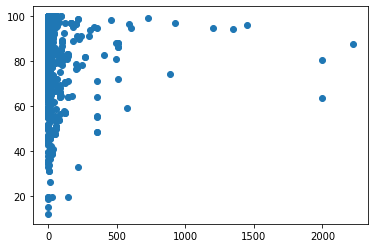

In [68]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.scatter(df.countTurnover,df.density_percent)

In [70]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data = pd.read_csv('data.csv', parse_dates=[0])
train, test = train_test_split(data, test_size=0.2) #разбиваем на обучающую и тестовую выборку

real_features = ['meanWidth', 'meanHeight', 'meanLength', 'meanVolume', 
                 'countStacking', 'countTurnover', 'boxesCount', 
                 'loadingWidth', 'loadingWidth', 'loadingLength']  # вещественные признаки
target_feature = 'density_percent'  # целевой признак

model = LinearRegression(fit_intercept=True)  # объявляем модель
model.fit(train[real_features], train[target_feature])  # обучаем

print('Оценки коэффициентов перед признаками\n', model.coef_)

print('Оценка свободного коэффициента\n', model.intercept_)

test_preds = model.predict(test[real_features])

print('MSE = ', round(np.sqrt(((test[target_feature] - test_preds) ** 2).mean()), 2))

def mean_absolute_percentage_error(y_true, y_pred):
    return 100 * (np.abs(y_true - y_pred) / y_true).mean()
print('MAPE = ', round(mean_absolute_percentage_error(test[target_feature], test_preds), 2))

Оценки коэффициентов перед признаками
 [ 7.75870882e-04  9.41682585e-03  1.70358036e-03  1.97626485e-10
  8.51009612e-02  6.17422438e-03 -7.41110471e-02 -7.70549949e-03
 -7.70549949e-03  6.57545093e-04]
Оценка свободного коэффициента
 89.32125177455892
MSE =  14.78
MAPE =  20.29


In [71]:
print(test[real_features])

              meanWidth   meanHeight   meanLength    meanVolume  \
373               300.0   200.000000  9000.000000  5.400000e+08   
291  296.15384615384613   320.833333   585.256410  2.178721e+08   
420  1578.6666666666667  1643.000000  2396.666667  1.048862e+10   
602   988.2727272727273  2280.681818  1358.363636  3.058654e+09   
550    621.448275862069   467.068966  1664.241379  4.635729e+08   
..                  ...          ...          ...           ...   
426  1235.4545454545455  1119.545455  1076.363636  1.471451e+09   
7     843.3333333333334   819.074074  1584.814815  1.164730e+09   
206  235.11864406779662   202.101695   356.661017  1.906444e+07   
453              1040.0  1144.666667   621.333333  7.630833e+08   
228               850.0  2000.000000  1387.500000  2.380000e+09   

     countStacking  countTurnover  boxesCount  loadingWidth  loadingWidth  \
373             16             16          16        2490.0        2490.0   
291            312            306        

In [72]:
print(test_preds)

[ 77.64784185  70.59542799  82.4667661   83.34981276  62.67176054
  89.97283639  81.85270244  84.54121241  67.67264931  82.18175044
  68.44857637  75.28447389  78.44536984  69.5873517   87.65667863
  69.5873517   82.20546605  76.77233543  83.49040461  64.72097949
  66.35165516  71.04472166  89.32303454  75.32227281  72.36941387
  79.62745257  70.87419231  66.45407295  83.18800555  69.15503192
  83.44119076  83.81831642  70.7877712   85.57602764  96.79958309
  83.08330615  66.15907789  80.33534886  67.8109865   81.91785163
  65.99544829  77.09399114  80.57672005  76.56236507  74.53642316
  83.34179647  80.26963154  72.05102933  79.5573557   70.33600477
  83.35133575  78.6498716   79.87298287  76.73672187  65.99544829
  74.48638107  71.15082981  82.69187846  67.322923    91.71564853
  82.72602174  80.86606654  64.56010233  68.26851795  77.41650501
  80.37946382  80.60310003  68.22137496  71.83485945  72.03973207
  75.73928439  68.25678357  69.15503192  74.60116389  80.12554409
  81.85291

In [81]:
rf = pd.DataFrame(test)
rf['prediction'] = test_preds
rf

,meanWidth,meanHeight,meanLength,meanVolume,countStacking,countTurnover,boxesCount,loadingWidth,loadingHeight,loadingLength,density_percent,prediction
373,300.0,200.000000,9000.000000,5.400000e+08,16,16,16,2490.0,2590.0,13490.0,80.03557,77.647842
291,296.15384615384613,320.833333,585.256410,2.178721e+08,312,306,312,2352.0,2698.0,12032.0,93.90776,70.595428
420,1578.6666666666667,1643.000000,2396.666667,1.048862e+10,0,3,3,2490.0,2590.0,13490.0,60.24496,82.466766
602,988.2727272727273,2280.681818,1358.363636,3.058654e+09,0,0,22,2490.0,2590.0,13490.0,87.57304,83.349813
550,621.448275862069,467.068966,1664.241379,4.635729e+08,24,9,29,2480.0,2700.0,5800.0,46.73114,62.671761
...,...,...,...,...,...,...,...,...,...,...,...,...
426,1235.4545454545455,1119.545455,1076.363636,1.471451e+09,0,0,22,2480.0,2650.0,13600.0,58.77584,72.039732
7,843.3333333333334,819.074074,1584.814815,1.164730e+09,54,0,54,2490.0,2590.0,13490.0,82.70950,71.709040
206,235.11864406779662,202.101695,356.661017,1.906444e+07,59,0,59,800.0,1800.0,1200.0,72.28060,81.126858
453,1040.0,1144.666667,621.333333,7.630833e+08,75,75,75,2480.0,2860.0,13600.0,79.32225,74.127227
